In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv(r'D:\anaconda\housing.csv')
df1 = df[['price','area','bedrooms','stories','parking']]

In [4]:
df1.head(10)

,price,area,bedrooms,stories,parking
0,13300000,7420,4,3,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,2,2
5,10850000,7500,3,1,2
6,10150000,8580,4,4,2
7,10150000,16200,5,2,0
8,9870000,8100,4,2,2
9,9800000,5750,3,4,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     545 non-null    int64
 1   area      545 non-null    int64
 2   bedrooms  545 non-null    int64
 3   stories   545 non-null    int64
 4   parking   545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [6]:
df1.describe()

,price,area,bedrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


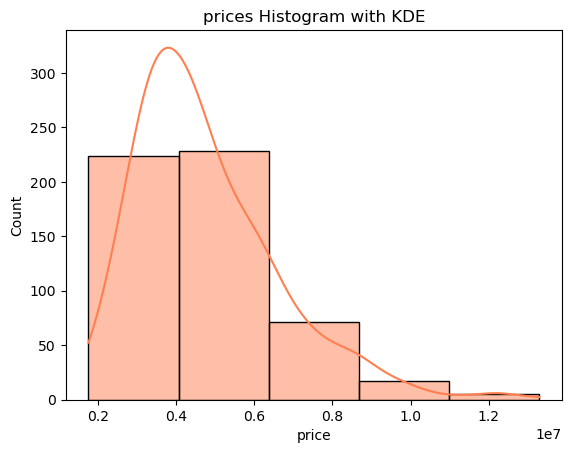

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True, bins=5, color='coral')
plt.title('prices Histogram with KDE')
plt.show()

In [8]:
print("Null values in each column:")
print(df1.isnull().sum())

Null values in each column:
price       0
area        0
bedrooms    0
stories     0
parking     0
dtype: int64


In [9]:
duplicates = df1[df1.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       price  area  bedrooms  stories  parking
55   7350000  6000         3        2        1
185  5110000  3000         3        2        0
367  3675000  3630         2        1        0


In [10]:
df1.describe()

,price,area,bedrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


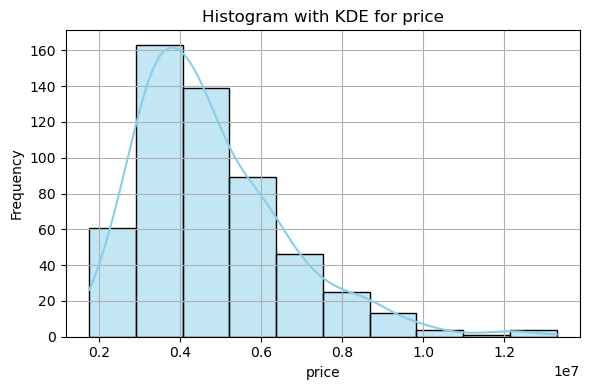

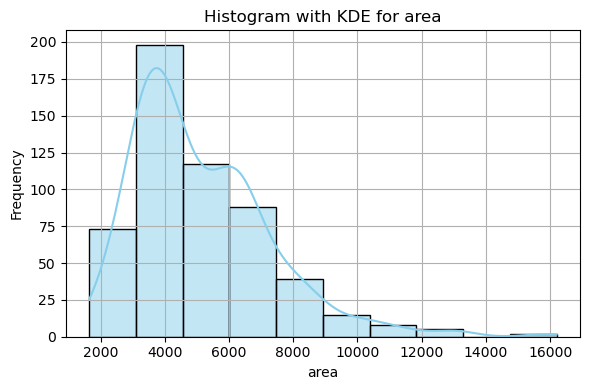

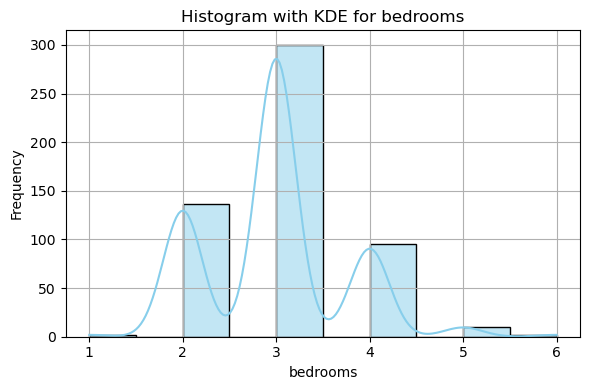

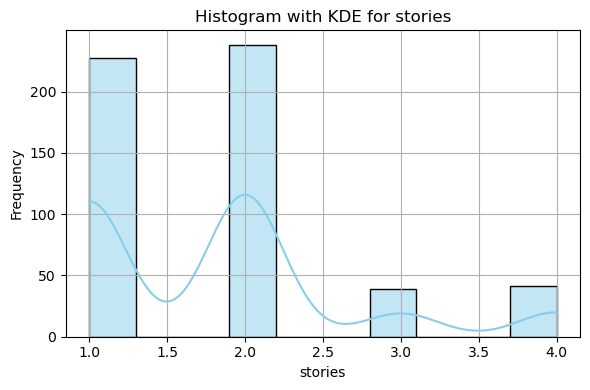

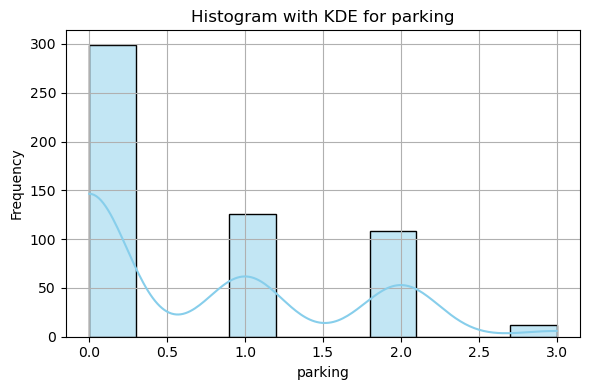

In [11]:
# Select only numeric columns
numeric_cols = df1.select_dtypes(include='number')

# Plot individual histograms with KDE
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

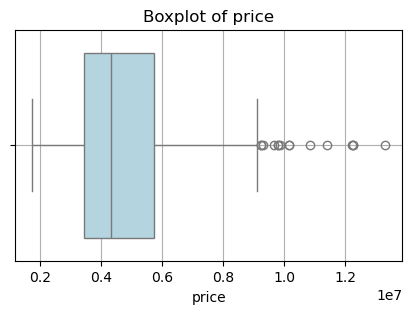

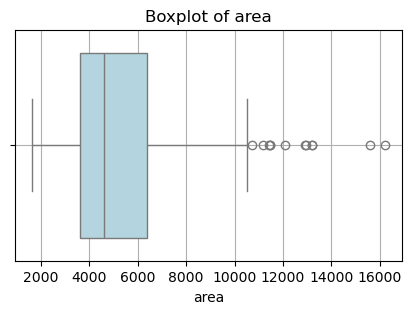

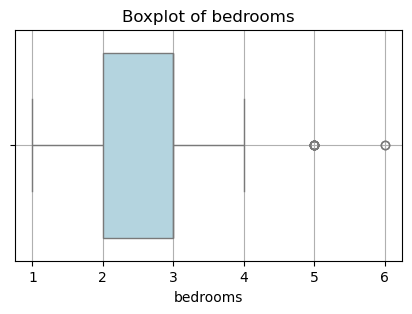

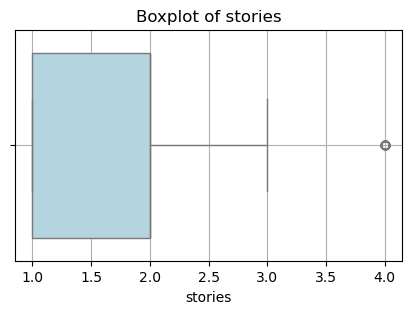

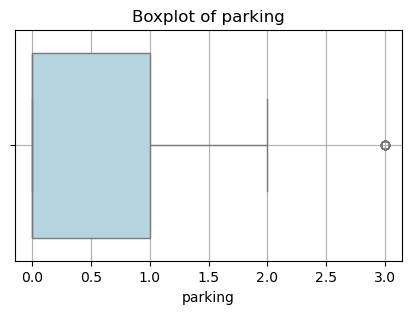

In [12]:
numeric_cols = df1.select_dtypes(include= 'number').columns

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

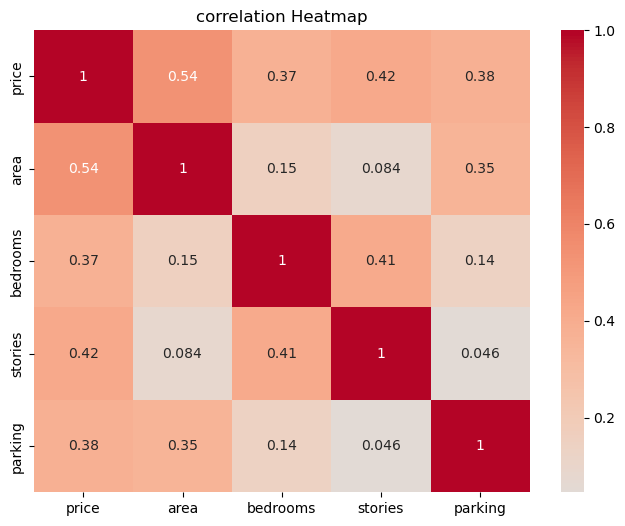

In [13]:
correlation_matrix = df1.corr()



plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation Heatmap')
plt.show()

In [14]:
# Function to remove outliers from all numeric columns
def remove_outliers_iqr(df1):
    # Select only numeric columns
    numeric_cols = df1.select_dtypes(include='number').columns
    # Start with all True mask using df1
    mask = pd.Series(True, index=df1.index)

    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Update mask using df1
        mask &= df1[col].between(lower_bound, upper_bound)

    # Return filtered DataFrame without outliers
    return df1[mask]

# Example usage
import pandas as pd
df1 = pd.read_csv(r"D:\anaconda\housing.csv")

# Remove outliers
df_cleaned = remove_outliers_iqr(df1)

# Output
print("Original DataFrame shape:", df1.shape)
print("After Removing Outliers shape:", df_cleaned.shape)


Original DataFrame shape: (545, 13)
After Removing Outliers shape: (463, 13)


In [15]:
X = df1[['area', 'bedrooms', 'parking','stories']]
y = df1['price']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Add constant (intercept term) to train and test features
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit model on training data
model = sm.OLS(y_train, X_train_const).fit()

# Print model summary
print("Model Summary (Training Data):")
print(model.summary())

# Predict on test data
y_pred = model.predict(X_test_const)

# Combine actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nTest Set Predictions:")
print(results)

Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     99.67
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           5.30e-60
Time:                        10:02:17   Log-Likelihood:                -6744.9
No. Observations:                 436   AIC:                         1.350e+04
Df Residuals:                     431   BIC:                         1.352e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.082e+05

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['feature'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_df)


    feature        VIF
0      area   6.271448
1  bedrooms  10.374814
2   parking   1.863462
3   stories   6.290151


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_const = sm.add_constant(X_train_poly)
X_test_const = sm.add_constant(X_test_poly)

model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     34.99
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           9.36e-62
Time:                        10:02:17   Log-Likelihood:                -6719.5
No. Observations:                 436   AIC:                         1.347e+04
Df Residuals:                     421   BIC:                         1.353e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.317e+05   8.65e+05      0.615      0.5

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# STEP 1: Load data
df = pd.read_csv(r"D:\anaconda\housing.csv")

# STEP 2: Preprocess
target_column = "price"  # 🔁 Replace this if your column is different
X = df.drop(target_column, axis=1)
y = df[target_column]

# Optional: Remove outliers
def remove_outliers_iqr(df1):
    numeric_cols = df1.select_dtypes(include='number').columns
    mask = pd.Series(True, index=df1.index)
    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= df1[col].between(lower, upper)
    return df1[mask]

df_cleaned = remove_outliers_iqr(df)
X = df_cleaned.drop(target_column, axis=1)
y = df_cleaned[target_column]

# STEP 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: (Optional) Scale data
# Only if features have large variations in scale
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# STEP 5: Train Random Forest
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")     # Want this ≥ 0.90
print(f"🧮 MSE: {mse:.2f}")

# STEP 7: Show predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(results.head(10))


ValueError: could not convert string to float: 'yes'

In [22]:
print(df.dtypes)


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [24]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(df.columns.tolist())



['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"D:\anaconda\housing.csv")

# Step 1: Remove outliers using IQR method
def remove_outliers_iqr(df1):
    numeric_cols = df1.select_dtypes(include='number').columns
    mask = pd.Series(True, index=df1.index)
    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= df1[col].between(lower, upper)
    return df1[mask]

df = remove_outliers_iqr(df)

# Step 2: Encode categorical variables (like 'yes', 'no', etc.)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 3: Define features and target
target_column = "price"  # 🔁 Replace with your actual target column name if different
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n✅ R² Score: {r2:.4f}")
print(f"🧮 Mean Squared Error: {mse:.2f}")

# Step 7: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(results.head(10))



✅ R² Score: 0.5861
🧮 Mean Squared Error: 1077660213667.98

Sample Predictions:
      Actual     Predicted
296  4200000  6.708346e+06
75   6650000  4.923642e+06
85   6510000  6.581540e+06
293  4200000  3.065008e+06
188  5075000  4.346598e+06
274  4340000  4.263283e+06
387  3500000  4.570383e+06
282  4270000  3.747065e+06
539  1855000  2.564038e+06
134  5803000  5.686838e+06


In [30]:
# Examples: Add new features from existing ones
df['price_per_sqft'] = df['price'] / (df['area'] + 1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['rooms_per_area'] = df['total_rooms'] / (df['area'] + 1)


In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1],
}

grid = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best R² Score from Grid Search:", grid.best_score_)
model = grid.best_estimator_


ModuleNotFoundError: No module named 'xgboost'